# 1. Perkenalan

Perkenalkan nama saya Zidny Yasrah Sallum, pada kesempatan kali ini saya akan membuat model clustering untuk melakukan customer segmentation dari dataset kartu kredit sebuah bank, data ini berisi informasi seperti balance, limit, payment, tenure dan lain-lain dari selama 6 bulan terakhir.

# 2. Query SQL

Berikut query yang saya gunakan untuk mengambil seluruh kolom data dari google cloud platform, dengan nama dataset `phase1_ftds_020_rmt` dan table bernama `credit-card-information`. Setelah itu saya memfilter datanya untuk mengambil data genap saja pada kolom `cust_id`.

```
SELECT 
*
FROM 
`ftds-hacktiv8-project.phase1_ftds_020_rmt.credit-card-information`
WHERE
mod(CUST_ID, 2) = 0;
```

# 3. Import Libraries

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score
import pickle

import warnings
warnings.filterwarnings('ignore')

# 4. Data Loading

In [381]:
# Menggunakan pandas untuk read dataset csv yang sudah diambil
data = pd.read_csv('dataset.csv')

In [382]:
# Menampilkan 10 baris pertama pada data
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [383]:
# Menampilkan 10 baris terakhir pada data
data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [384]:
# Melihat info dari dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Terlihat pada info diatas, tipe data yang ada pada dataset hanyalah numerik atau lebih tepatnya hanya mengandung integer dan float. Data berisi 18 kolom dengan 4475 baris. Pada kolom `MINIMUM_PAYMENTS` memiliki nilai non-null yang lebih rendah dari kebanyakan data lainnya, mengindikasikan adanya missing values pada kolom ini.

Berikut penjelasan masing-masing kolom pada dataset.

Kolom | Description
---|---
`CUST_ID` | Identification of Credit Card holder 
`BALANCE` | Balance amount left in their account to make purchases
`BALANCE_FREQUENCY` | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
`PURCHASES` | Amount of purchases made from account
`ONEOFF_PURCHASES` | Maximum purchase amount done in one-go
`INSTALLMENTS_PURCHASES` | Amount of purchase done in installment
`CASH_ADVANCE` | Cash in advance given by the user
`PURCHASES_FREQUENCY` | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
`ONEOFFPURCHASESFREQUENCY` | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
`PURCHASESINSTALLMENTSFREQUENCY` | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
`CASHADVANCEFREQUENCY` | How frequently the cash in advance being paid
`CASHADVANCETRX` | Number of Transactions made with "Cash in Advanced"
`PURCHASES_TRX` | Number of purchase transactions made
`CREDIT_LIMIT` | Limit of Credit Card for user
`PAYMENTS` | Amount of Payment done by user
`MINIMUM_PAYMENTS` | Minimum amount of payments made by user
`PRCFULLPAYMENT` | Percent of full payment paid by user
`TENURE` | Tenure of credit card service for user

# 5. Exploratory Data Analysis (EDA)

Hal yang ingin saya lakukan pertama adalah melihat kolom `TENURE`. Dalam kartu kredit, "tenure" adalah jangka waktu atau periode yang ditawarkan oleh penerbit kartu kredit untuk membayar jumlah tagihan tertentu dalam cicilan tetap.

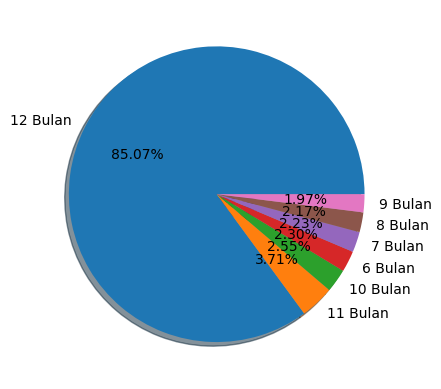

In [385]:
# Mengambil jumlah dari tiap value di kolom tenure
tenure = data['TENURE'].value_counts()

# Konfigurasi untuk Pie Chart
y = np.array(tenure)
labels = ['12 Bulan','11 Bulan','10 Bulan','6 Bulan','7 Bulan','8 Bulan','9 Bulan']

# Membuat dan Menampilkan Pie Chart
plt.pie(y, labels=labels,  shadow = True, autopct='%.2f%%')
plt.show()

Bisa terlihat dari chart diatas, banyak orang yang menggunakan opsi 12 bulan dalam melakukan cicilannya. Untuk memperjelas maksud dari tenure itu sendiri saya akan berikan contoh misalnya, jika saya melakukan pembelian menggunakan kartu kredit dan penerbit kartu menawarkan opsi "tenure" selama 12 bulan, artinya saya dapat membayar tagihan tersebut dalam 12 cicilan tetap selama 12 bulan.

Setelah ini saya ingin melihat pada kolom-kolom yang memiliki skala nilai dari 0 sampai 1 pada isi kolomnya. yaitu pada kolom `BALANCE_FREQUENCY`, `PURCHASES_FREQUENCY`, `ONEOFFPURCHASESFREQUENCY`, dan `PURCHASESINSTALLMENTSFREQUENCY`. 1 artinya semakin sering dan mendekati 0 artinya sangat jarang.

<Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='Count'>

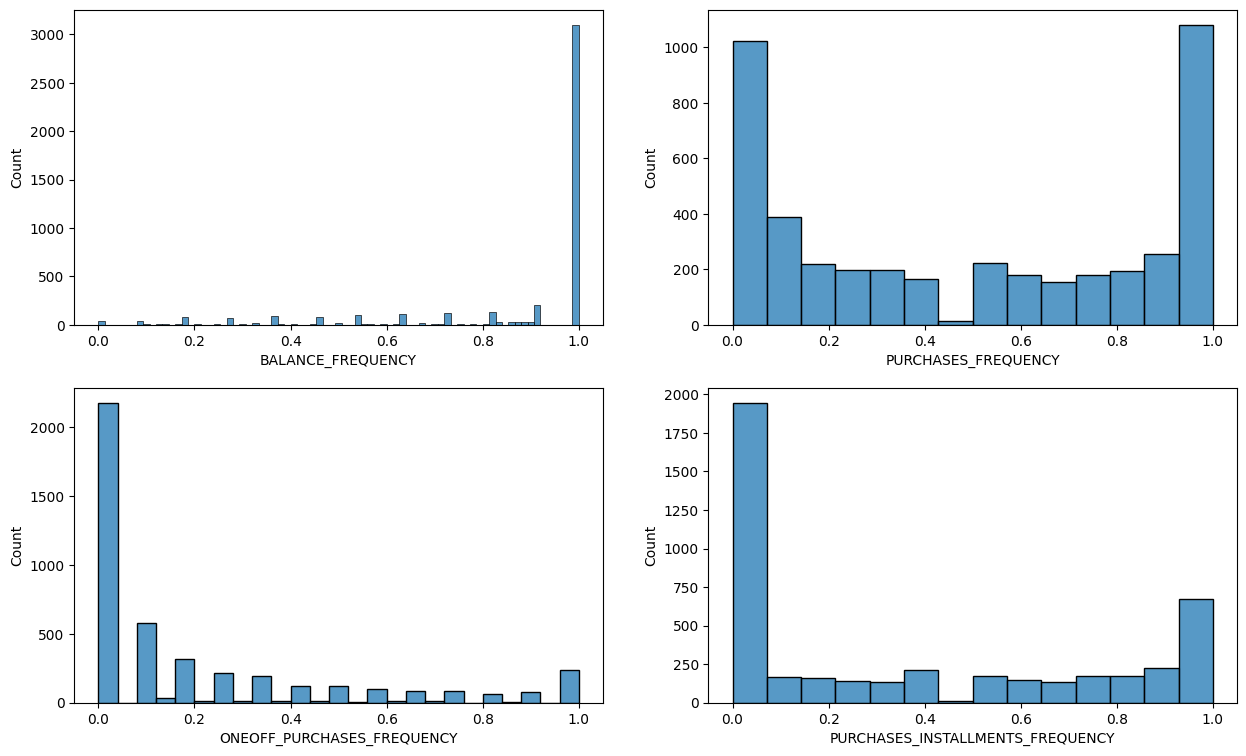

In [386]:
# Membuat histplot untuk tiap kolom 
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.histplot(data=data,x='BALANCE_FREQUENCY')

plt.subplot(2,2,2)
sns.histplot(data=data,x='PURCHASES_FREQUENCY')

plt.subplot(2,2,3)
sns.histplot(data=data,x='ONEOFF_PURCHASES_FREQUENCY')

plt.subplot(2,2,4)
sns.histplot(data=data,x='PURCHASES_INSTALLMENTS_FREQUENCY')

* Pada kolom `BALANCE_FREQUENCY`, terlihat bahwa didominasi oleh angka 1, menunjukkan mayoritas pengguna kartu kredit dibank ini sangat sering mengupdate saldo mereka.

* Pada kolom `PURCHASES_FREQUENCY`, terlihat kalau ada angka yang hampir seimbang antara 1 dan 0 serta diantaranya terdapat nilai yang cukup banyak juga, menunjukkan banyak variasi atau karakteristik dari nasabah bank ini, ada yang sering melakukan transaksi, ada yang jarang, dan ada juga yang berada di tengah-tengah yaitu ga terlalu sering dan juga ga terlalu jarang.

* Pada kolom `ONEOFF_PURCHASES_FREQUENCY`, untuk "one-go" artinya sejumlah pembelian dilakukan dalam waktu yang relatif dekat atau dalam satu transaksi saja. Misalnya, ketika seseorang pergi berbelanja ke toko dan membeli beberapa barang sekaligus, atau ketika seseorang berbelanja online dan membeli beberapa item dalam satu transaksi. Kembali ke data diatas, terlihat kalau nilai yang dominan berada diangka 0, menunjukkan kalau nasabah bank ini jarang melakukan transaksi yang sifatnya sekaligus dan lebih prefer transaksi terpisah-pisah untuk tiap barangnya.

* Pada kolom `PURCHASES_INSTALLMENTS_FREQUENCY`, juga dominan pada angka 0 yang artinya pengguna kartu kredit di bank ini jarang melakukan angsuran atau cicilan dalam melakukan transaksi.

<Axes: xlabel='BALANCE', ylabel='Count'>

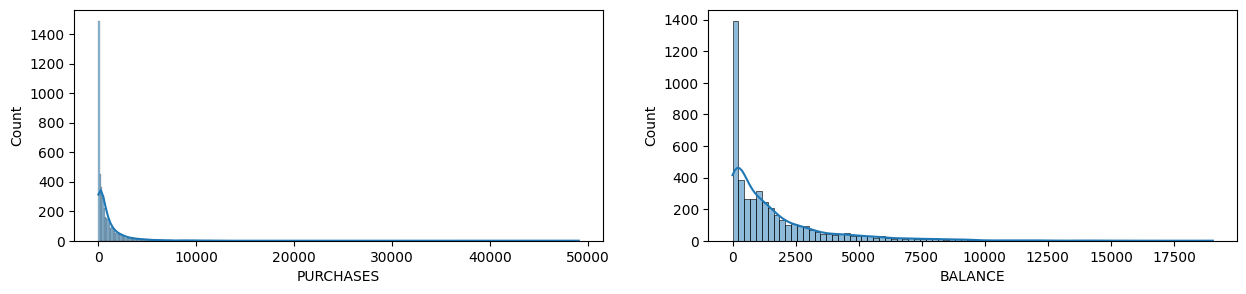

In [387]:
# membuat histplot pada kolom purchases dan balance
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.histplot(data=data, x='PURCHASES',kde=True)

plt.subplot(1,2,2)
sns.histplot(data=data, x='BALANCE',kde=True)

* Pada kedua kolom Purchases dan balance dapat dilihat bahwa distribusi dari data ini tidak normal dan ada skew, mengindikasikan adanya outlier pada data ini. Kemungkinan memang ada beberapa orang-orang yang melakukan transaksi dengan nominal yang jauh lebih tinggi dari kebanyakan orang-orang lainnya 

Setelah ini saya akan melihat properti dari kolom CUST_ID

In [388]:
# Membandingkan jumlah unique values dari kolom CUST_ID
print('Jumlah Unique Values dari kolom CUST_ID :',data['CUST_ID'].nunique())
print('Jumlah Baris pada Data :',data.shape[0])

Jumlah Unique Values dari kolom CUST_ID : 4475
Jumlah Baris pada Data : 4475


Dapat dilihat bahwa jumlah unique values dari kolom CUST_ID sama dengan jumlah baris data yang ada pada dataset, artinya setiap value yang ada di kolom tersebut memiliki data yang berbeda-beda. oleh karena itu sebaiknya saya drop saja kolom ini pada Feature Engineering nantinya.

Setelah ini saya ingin lihat persebaran data balance dan purchase

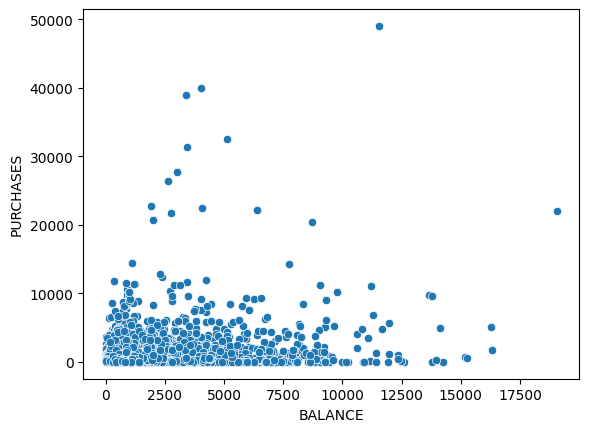

In [389]:
# Membuat scatterplot untuk membandingkan kolom balance dan purchases
sns.scatterplot(x='BALANCE', y='PURCHASES', data=data);

Dapat dilihat dari persebaran diatas, balance yang tinggi tidak selalu memiliki purchase yang tinggi juga, malah nilai purchase yang tinggi berada di balance yang tidak terlalu tinggi.

Setelah ini saya akan lanjut ke feature engineering

# 6. Feature Engineering

Seperti yang saya narasikan pada bagian EDA, saya akan drop kolom CUST_ID

In [391]:
# Menghapus kolom CUST_ID
x = data.drop('CUST_ID', axis=1)

# Melihat jumlah kolom pada data 
x.shape[1]

17

## Missing Values

Pada bagian di EDA diatas saya juga melihat adanya missing values pada data, saya akan handling data missing valuesnya sekarang.

In [392]:
# Melihat kolom yang memiliki missing values
x.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dapat dilihat dari rincian diatas, kolom CREDIT_LIMIT mempunyai missing values sebanyak 1 dan kolom MINIMUM_PAYMENTS memiliki missing values sebanyak 158. 

Saya akan imputasi missing values tersebut menggunakan KNNImputer

Alasan saya menggunakan KNNImputer adalah karena metode ini melakukan imputasi data dengan mempertimbangkan hubungannya dengan tetangga terdekat. Hal ini memungkinkan pengisian nilai yang lebih akurat berdasarkan lingkungan data sekitarnya.

In [393]:
# Menggunakan KNNImputer terhadap data x
imputer = KNNImputer()
x = pd.DataFrame(imputer.fit_transform(x),columns=x.columns)

# Melihat apakah ada null values pada dataframe
print('Missing Values :',x.isnull().values.any())

Missing Values : False


Dapat dilihat, sudah tidak ada missing values pada data.

## Duplicate Data

In [394]:
# Mengecek apakah ada data duplikat
print('Duplicate Data :',x.duplicated().sum())

Duplicate Data : 0


## Outliers

Saya tidak akan menghapus atau drop outlier pada sesi ini, namun untuk menghandle outlier saya akan melakukan standarisasi menggunakan StandardScaler nantinya. Alasannya dikarenakan nilai outlier ini merupakan nilai murni pada data dan saya tidak ingin menghilangkan informasi berharga tersebut. Saya bisa bilang nilai outlier adalah nilai murni didasari oleh analisis yang saya lakukan pada bagian EDA. Didapat bahwa ada beberapa orang yang memiliki balance, purchase dkk yang jauh lebih tinggi dari kebanyakan orang-orang lainnya. 

## Pencarian Nilai K

Saya akan menggunakan elbow method untuk mencari nilai K yang optimal untuk digunakan pada algoritma KMeans nantinya.

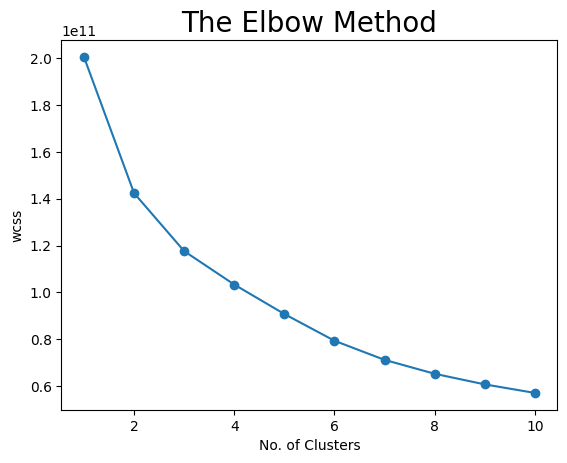

In [395]:
wcss = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Saya tidak bisa menentukan dengan jelas dimana perubahan yang signifikannya, oleh karena itu saya akan coba menentukan nilai k nya menggunakan silhouette score. 

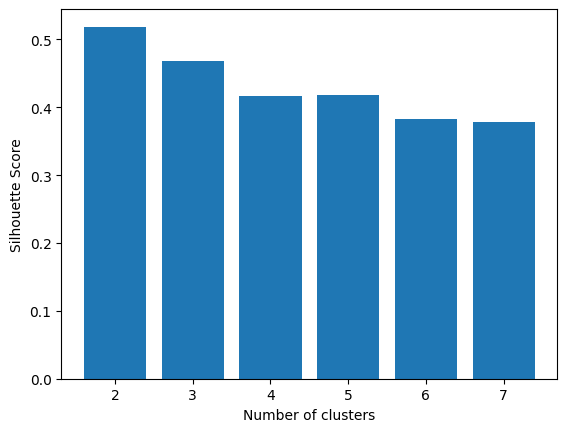

In [396]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(x, KMeans(n_clusters = n_cluster).fit_predict(x)));
    
# Membuat plot untuk melihat hasil terbaik
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Silhouette score tertinggi berada di nilai 2, tapi menurut saya cluster berjumlah 2 sangatlah kecil, jadi saya lebih prefer menggunakan nilai 3 saja sebagai nilai K pada atau jumlah cluster pada algoritma KMeans.

# 7. Model Definition

In [397]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)

# 8. Model Training

In [398]:
y_pred = km.fit_predict(x)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

# 9. Model Evaluation

In [399]:
x['cluster'] = list(y_pred)
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0.0,2.0,1200.0,0.000000,100.383357,0.0,8.0,1
1,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0.0,1.0,1000.0,215.325023,410.484825,0.0,8.0,1
2,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0.0,1.0,1500.0,0.000000,33.757190,0.0,8.0,1
3,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0.0,1.0,1000.0,258.032630,151.696433,0.0,8.0,1
4,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0.0,1.0,1500.0,397.090516,227.143184,0.0,8.0,1


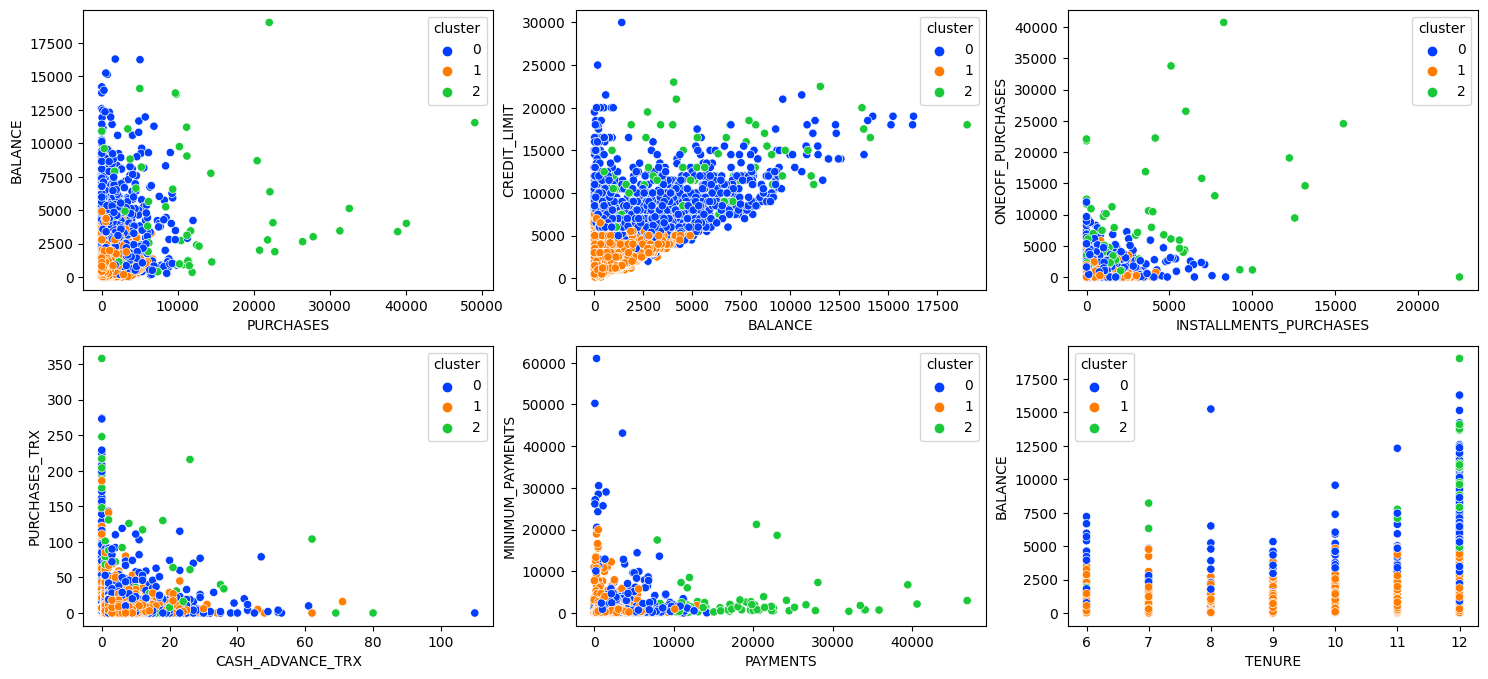

In [400]:
plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
sns.scatterplot(data=x, x="PURCHASES", y="BALANCE", hue="cluster",palette="bright");

plt.subplot(2,3,2)
sns.scatterplot(data=x, x="BALANCE", y="CREDIT_LIMIT", hue="cluster",palette="bright");

plt.subplot(2,3,3)
sns.scatterplot(data=x, x="INSTALLMENTS_PURCHASES", y="ONEOFF_PURCHASES", hue="cluster",palette="bright");

plt.subplot(2,3,4)
sns.scatterplot(data=x, x="CASH_ADVANCE_TRX", y="PURCHASES_TRX", hue="cluster",palette="bright");

plt.subplot(2,3,5)
sns.scatterplot(data=x, x="PAYMENTS", y="MINIMUM_PAYMENTS", hue="cluster",palette="bright");

plt.subplot(2,3,6)
sns.scatterplot(data=x, x="TENURE", y="BALANCE", hue="cluster",palette="bright");

Berikut sekilas insight yang bisa saya tarik,

* Cluster 0 Menunjukkan orang-orang atau nasabah yang memiliki tingkat pembayaran, pembelian, saldo ataupun transaksi yang ada di kelas menengah keatas. Menunjukkan orang-orang dicluster ini merupakan orang-orang yang cukup sering melakukan aktivitas pada kartu kreditnya baik itu melakukan pembayaran, cicilan dan lain-lain.

* Cluster 1 menunjukkan orang-orang atau nasabah yang memiliki aktivitas bank yang kecil atau mereka mempunyai transaksi, saldo, limit yang rendah dari kebanyakan cluster-cluster lainnya. Menunjukkan kalau orang-orang dicluster ini kemungkinan memiliki penghasilan yang rendah atau bisa juga merupakan orang yang hemat.

* Cluster 2 menunjukkan outlier atau orang-orang yang mempunyai saldo, jumlah transaksi, cicilan, dan atribut-atribut lain yang jauh lebih besar dari kebanyakan orang-orang biasa. Menunjukkan pada cluster ini menampung sejumlah orang-orang yang sukses dan memiliki aktivitas yang tinggi terhadap kartu kreditnya

Terlihat pada data diatas, banyaknya dimensi membuat cluster yang dihasilkan susah untuk diinterpretasi dan cluster menyebar secara tidak teratur. Untuk itu saya akan melakukan reduksi dimensi menggunakan PCA baru setelahnya melakukan clustering.

## PCA

Sebelum melakukan reduksi dimensi menggunakan PCA, saya akan melakukan standarisasi pada data dengan menggunakan StandardScaler alasannya karena algoritma KMeans yang berbasis pada perhitungan jarak, sangat dipengaruhi oleh skala data. Jika fitur-fitur memiliki skala yang berbeda, algoritma dapat memberikan bobot yang berbeda pada masing-masing fitur. Dengan menggunakan StandardScaler, saya dapat memastikan bahwa semua fitur memiliki skala yang serupa dan dapat diperlakukan dengan setara.

In [401]:
# Standarisasi menggunakan StandardScaler
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(x) 

# Mengubah array menjadi dataframe
x_scaled = pd.DataFrame(x_scaled) 

# Mereduksi dimensi pada data
pca = PCA(n_components = 2) 
x_reduced = pca.fit_transform(x_scaled) 
x_reduced = pd.DataFrame(x_reduced) 
x_reduced.columns = ['P1', 'P2'] 
  
# Menampilkan data yang sudah direduksi dimensinya
x_reduced.head()

,P1,P2
0,-2.280918,-1.514321
1,-1.873158,-0.814859
2,-2.319683,-1.438798
3,-1.648439,-0.836822
4,-1.232853,-0.640123


Untuk mencari nilai K nya saya akan menggunakan cara yang sama yaitu dengan elbow method

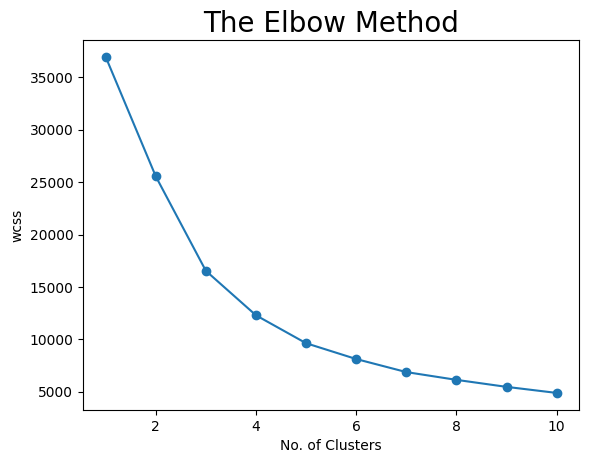

In [402]:
wcss = []
# Membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(x_reduced)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Kasus tadi ternyata masih sama, saya masih kesulitan dalam menentukan nilai K nya dikarenakan tidak adanya tekukan yang signifikan pada graph diatas. Oleh karena itu saya akan gunakan silhouette score untuk menentukan nilai K paling optimalnya

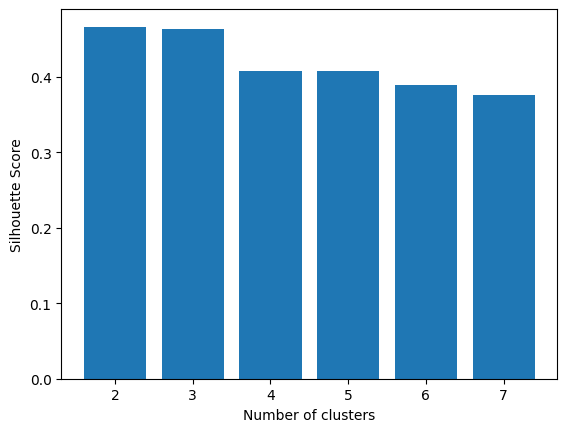

In [403]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(x_reduced, KMeans(n_clusters = n_cluster).fit_predict(x_reduced))) 
    
# Membuat plot untuk melihat hasil terbaik
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Dapat dilihat pada plot diatas, nilai k paling optimal berada antara K=2 dan K=3, untuk menyamakan nilai k dengan yang tadi, saya akan gunakan angka 3 saja.

In [404]:
# Melakukan train dengan jumlah cluster 3 pada data yang sudah direduksi dimensinya
km_pca = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 15)
y_pred = km_pca.fit_predict(x_reduced)
y_pred

array([0, 0, 0, ..., 2, 2, 2])

In [405]:
# Menambahkan kolom cluster pada data baru
x_reduced['cluster'] = list(y_pred)
x_reduced.head()

,P1,P2,cluster
0,-2.280918,-1.514321,0
1,-1.873158,-0.814859,0
2,-2.319683,-1.438798,0
3,-1.648439,-0.836822,0
4,-1.232853,-0.640123,0


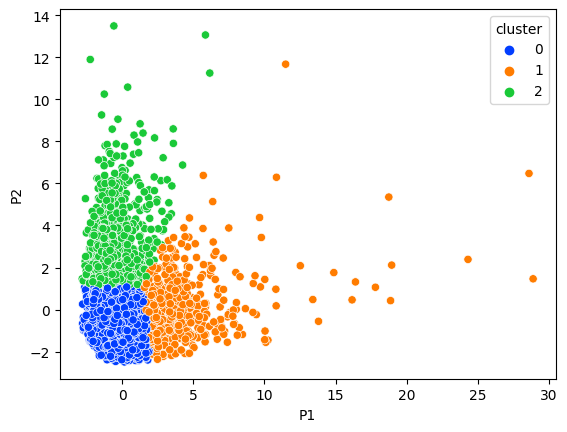

In [406]:
# Menampilkan scatterplot dari cluster di data baru
sns.scatterplot(data=x_reduced, x="P1", y="P2", hue="cluster",palette="bright");

# 10. Model Saving

In [407]:
# Retrain model dengan menghilangkan kolom cluster yang sudah dibuat
x = x.drop('cluster',axis=1)
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 5)
y_pred = km.fit_predict(x)

In [408]:
# Menyimpan file model dengan pickle
pickle.dump(km, open("KM.pkl", "wb"))

# 11. Model Inference

In [409]:
# Menggunakan pickle untuk meload model
km = pickle.load(open("KM.pkl", "rb"))

# Membuat data inference baru
data_inf = {
    'BALANCE': 123,
    'BALANCE_FREQUENCY': 123,
    'PURCHASES': 123,
    'ONEOFF_PURCHASES': 123,
    'INSTALLMENTS_PURCHASES': 123,
    'CASH_ADVANCE': 123,
    'PURCHASES_FREQUENCY': 123,
    'ONEOFF_PURCHASES_FREQUENCY': 123,
    'PURCHASES_INSTALLMENTS_FREQUENCY': 123,
    'CASH_ADVANCE_FREQUENCY': 123,
    'CASH_ADVANCE_TRX': 123,
    'PURCHASES_TRX': 123,
    'CREDIT_LIMIT': 123,
    'PAYMENTS': 123,
    'MINIMUM_PAYMENTS': 123,
    'PRC_FULL_PAYMENT': 123,
    'TENURE': 123,
}

# Mengubah dictionary ke dataframe
data_inf = pd.DataFrame([data_inf])

# Menampilkan dataframe baru
data_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123


In [410]:
# Melakukan prediksi dengan model dari data baru
prediksi = km.predict(data_inf)
print(prediksi)

[0]


# 12. Conclusion

Saya melakukan segmentasi customer dengan metode KMeans clustering, didapat 3 cluster yang masing-masing memiliki karakteristik berbeda-beda, berikut strategi yang bisa saya berikan kepada perusahaan bank 

* Cluster 0, strategi yang bisa digunakan untuk cluster ini adalah dengan melakukan peningkatan pelayanan, dan juga memberikan benefit-benefit tertentu yang diiharapkan dengan dilakukan hal tersebut mereka orang-orang dicluster ini bisa bertahan dan juga lebih aktif lagi dalam melakukan transaksi menggunakan kartu kredit. 

* Cluster 1 memiliki aktivitas yang kecil, jadi bank bisa melakukan strategi promo atau diskon kepada cluster ini untuk lebih aktif lagi dalam menggunakan kartu kreditnya 

* Cluster 2 bisa menjadi target utama dalam marketing credit card ini, dikarenakan orang-orang dicluster ini sangat aktif dalam menggunakan kartu kredit, dan juga cluster ini merupakan orang-orang yang memiliki balance, payment dll yang paling tinggi jika dibandingkan cluster lainnya. 

## Conceptual Problems

> Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Inertia dalam algoritma k-means adalah sebuah metrik yang digunakan untuk mengevaluasi kualitas clustering yang dihasilkan. Atau lebih detailnya, inertia adalah jumlah total jarak pangkat2 antara setiap titik data dalam dataset dengan centroid terdekatnya. 

Jadi, Semakin rendah nilai inertia, semakin rapat titik-titik data di dalam kluster dan semakin baik kualitas clustering yang dihasilkan oleh algoritma k-means.

> Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll)

Elbow Method adalah metode yang digunakan untuk menentukan jumlah kluster (K) yang optimal dalam algoritma k-means. Tujuannya adalah untuk membantu memilih jumlah kluster yang tepat untuk melakukan clustering berdasarkan nilai inertia dari k-means pada berbagai nilai K. Metode ini disebut "Elbow Method" karena pada grafik nilai inertia terhadap jumlah kluster, seringkali terlihat seperti "siku" (elbow) di mana penurunan yang cepat dalam inertia mulai melambat.

Berikut adalah cara penggunaan dan langkah-langkah dalam Elbow Method:

* Pertama, tentukan rentang nilai K yang akan dieksplorasi untuk menemukan jumlah kluster yang optimal. Rentang nilai K ini dapat dipilih berdasarkan pengetahuan domain tentang masalah yang sedang dihadapi atau bisa dicoba saja dengan berbagai nilai K.

* *Selanjutnya, jalankan algoritma k-means dengan setiap nilai K dalam rentang yang telah ditentukan. Untuk setiap K, hitung nilai inertia yang menggambarkan total jarak antara titik data dengan centroid terdekat.

* Setelah itu buat graph yang menunjukkan nilai inertia pada sumbu y dan jumlah kluster (K) pada sumbu x. Pada titik K yang lebih tinggi, nilai inertia umumnya lebih rendah karena k-means memiliki lebih banyak kluster untuk membagi data. Grafik ini akan menunjukkan pola penurunan inertia seiring dengan peningkatan K.

* Setelah itu cari lokasi pada grafik yang menunjukkan "siku" atau elbow. Ini biasanya adalah titik di mana penurunan inertia melambat secara drastis atau tidak lagi signifikan.

* Nah terakhir tinggal memilih nilai K yang terletak di elbow sebagai jumlah kluster yang optimal untuk clustering.

Kelebihan Elbow Method:
Sederhana dan mudah diimplementasikan.
Memberikan panduan awal dalam memilih jumlah kluster yang optimal.

Kelemahan Elbow Method:
Tidak selalu memberikan hasil yang jelas dan terkadang elbow tidak jelas atau tidak terlihat di grafik (seperti kasus diatas).
Bergantung pada pengamatan visual, yang dapat menjadi subjektif (bisa ada perbedaan pendapat untuk tiap orang).